In [130]:
import boto3
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import io
import IPython
from IPython.display import display
import urllib.request

In [131]:
def getImageAsBytes(imageurl):
    imagedata = urllib.request.urlopen(imageurl).read()
    return imagedata 


In [132]:
def getFaces(imageurl):
    imageasbytes = getImageAsBytes(imageurl)
    
    client = boto3.client('rekognition')
    response = client.detect_faces(
        Image={'Bytes': imageasbytes},
        Attributes = ['ALL']
    )
    print(response)
    return response["FaceDetails"]

In [133]:
def makeBoundingBoxes(image, labels, maxboxes=10):
    #image = Image(imageData)
    draw = ImageDraw.Draw(image) 
    imgWidth, imgHeight = image.size  
    for labelDetail in labels:
        print(labelDetail)
        
        #labelname = labelDetail["Name"]
        #labelconfidence = labelDetail["Confidence"]
        
        #for instance in labelDetail["Instances"]:    
        box = labelDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        fnt = ImageFont.load_default().font
        draw.line(points, fill='#00d400', width=2)  
        draw.text((left , top), "face", font = fnt, align ="left", fill='#00d400') 
    return image


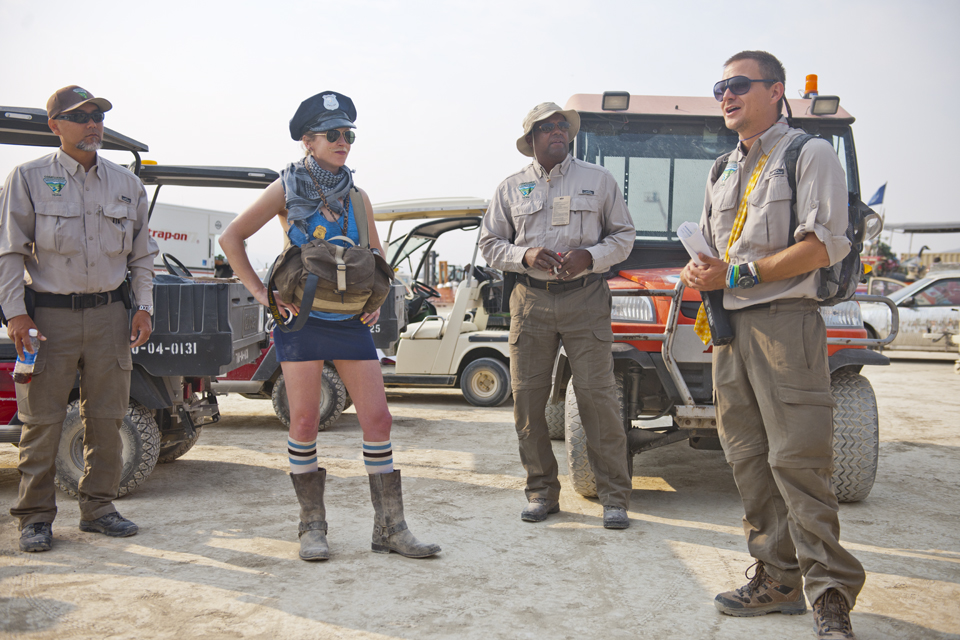

In [134]:
imageurl = "https://upload.wikimedia.org/wikipedia/commons/a/a0/Burning_Man_2013_Cargo_Cult_%289625733758%29_%283%29.jpg"
#imageurl = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Yoshua_Bengio_-_2017.jpg/1024px-Yoshua_Bengio_-_2017.jpg"
mydata = getImageAsBytes(imageurl)
display(IPython.display.Image(data=mydata))
stream = io.BytesIO(mydata)
img = Image.open(stream)

In [135]:
#labels = getLabels("https://raw.githubusercontent.com/dupled3031/AWS-AIML-examples/master/data/images/13.jpg")
faces = getFaces(imageurl)
#print(json.dumps(faces))

{'FaceDetails': [{'BoundingBox': {'Width': 0.052256710827350616, 'Height': 0.10543633997440338, 'Left': 0.7484219670295715, 'Top': 0.0943736657500267}, 'AgeRange': {'Low': 32, 'High': 48}, 'Smile': {'Value': True, 'Confidence': 73.73987579345703}, 'Eyeglasses': {'Value': True, 'Confidence': 98.88189697265625}, 'Sunglasses': {'Value': True, 'Confidence': 83.76384735107422}, 'Gender': {'Value': 'Male', 'Confidence': 98.70375061035156}, 'Beard': {'Value': False, 'Confidence': 81.66438293457031}, 'Mustache': {'Value': False, 'Confidence': 98.50662231445312}, 'EyesOpen': {'Value': True, 'Confidence': 99.97614288330078}, 'MouthOpen': {'Value': True, 'Confidence': 78.01233673095703}, 'Emotions': [{'Type': 'ANGRY', 'Confidence': 0.08555686473846436}, {'Type': 'CONFUSED', 'Confidence': 0.16657444834709167}, {'Type': 'SAD', 'Confidence': 0.12532666325569153}, {'Type': 'HAPPY', 'Confidence': 96.10719299316406}, {'Type': 'DISGUSTED', 'Confidence': 0.058505985885858536}, {'Type': 'FEAR', 'Confidenc

In [136]:
newimage = makeBoundingBoxes(img, faces, maxboxes=10)



{'BoundingBox': {'Width': 0.052256710827350616, 'Height': 0.10543633997440338, 'Left': 0.7484219670295715, 'Top': 0.0943736657500267}, 'AgeRange': {'Low': 32, 'High': 48}, 'Smile': {'Value': True, 'Confidence': 73.73987579345703}, 'Eyeglasses': {'Value': True, 'Confidence': 98.88189697265625}, 'Sunglasses': {'Value': True, 'Confidence': 83.76384735107422}, 'Gender': {'Value': 'Male', 'Confidence': 98.70375061035156}, 'Beard': {'Value': False, 'Confidence': 81.66438293457031}, 'Mustache': {'Value': False, 'Confidence': 98.50662231445312}, 'EyesOpen': {'Value': True, 'Confidence': 99.97614288330078}, 'MouthOpen': {'Value': True, 'Confidence': 78.01233673095703}, 'Emotions': [{'Type': 'ANGRY', 'Confidence': 0.08555686473846436}, {'Type': 'CONFUSED', 'Confidence': 0.16657444834709167}, {'Type': 'SAD', 'Confidence': 0.12532666325569153}, {'Type': 'HAPPY', 'Confidence': 96.10719299316406}, {'Type': 'DISGUSTED', 'Confidence': 0.058505985885858536}, {'Type': 'FEAR', 'Confidence': 0.11033643037

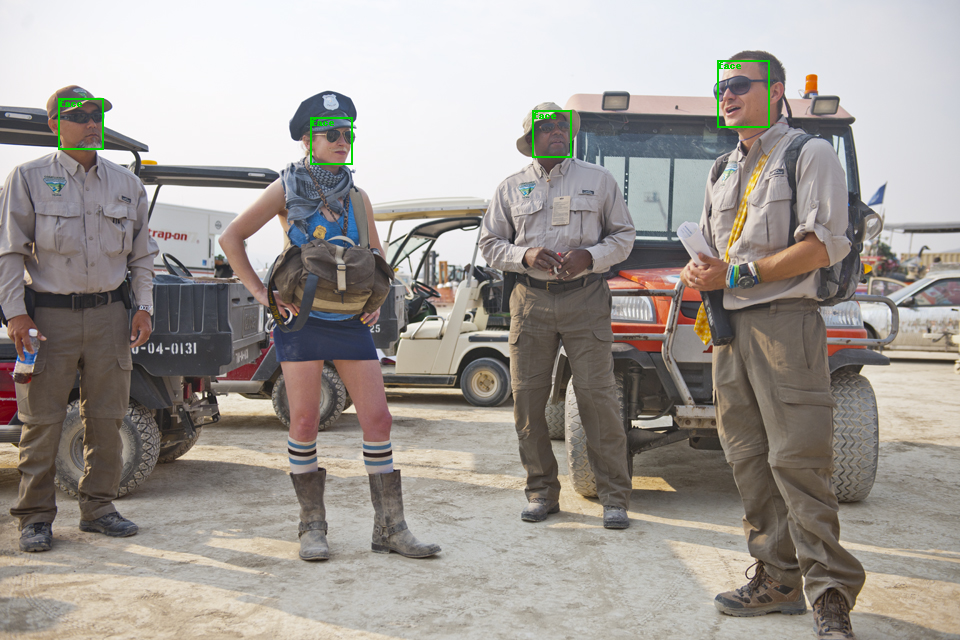

In [137]:
display(newimage)